# Make plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [2]:
# Add ids and comment out others when using
#princeton_id = 'aa8417'
princeton_id = 'ns5404'
#princeton_id = 'jf...'

project_dir = f'/scratch/gpfs/{princeton_id}/QCB557_project'

model_name = 'fine_tune_full_v0'
model_out_dir = f'{project_dir}/models/{model_name}'

### Training and validation loss curves

In [ ]:
# read the log
log_df = pd.read_csv(f'{project_dir}/model_output/log_{model_name}.csv')

# plot the loss curve
epoch = log_df['epoch'].unique()[:-1]
train = log_df['loss'].dropna()
validation = log_df['eval_loss'].dropna()

plt.plot(epoch, train, label='training loss')
plt.plot(epoch, validation, label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training and validation loss curve')

plt.legend()
plt.show()

### Validation accuracy

In [ ]:
# plot the accuracy curve

valid_acc = log_df['eval_accuracy'].dropna()

plt.plot(epoch, valid_acc, label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('training and validation accuracy curves')

plt.legend()
plt.show()

### Validaton precision and recall

In [ ]:
# plot other metrics
valid_prec = log_df['eval_precision'].dropna()
valid_rec = log_df['eval_recall'].dropna()

plt.plot(epoch, valid_prec, label='precision')
plt.plot(epoch, valid_rec, label='recall')
plt.xlabel('epoch')
plt.ylabel('precision/recall')
plt.title('precision and recall during validation')

plt.legend()
plt.show()

### Test metrics

In [6]:
results_df = pd.read_csv(f'{project_dir}/model_output/results_{model_name}.csv')

In [7]:
results_df

,true_labels,predicted_labels
0,1,0
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
2879,0,1
2880,0,1
2881,0,1
2882,0,1


In [8]:
true_labels = results_df['true_labels']
predicted_labels = results_df['predicted_labels']

In [9]:
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

In [10]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.3422330097087379
Precision: 0.3969335604770017
Recall: 0.4556714471968709


### Layer freezing experiment plots for training and validation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
layers = range(0, 13)
#layers = range(1, 13)
lr = '1e-7'

all_train_data = {}

In [9]:
for layer in layers:
    if lr in ['1e-7']:
        model_name = f'fine_tune_parallel_v{layer}'
        log = pd.read_csv(f'/scratch/gpfs/{princeton_id}/QCB557_project/model_output/parallel_{lr}_042524/log_{model_name}.csv')
    elif lr in ['1e-6']:
        model_name = f'fine_tune_parallel_v{layer}'
        log = pd.read_csv(f'/scratch/gpfs/{princeton_id}/QCB557_project/model_output/parallel_{lr}_041624/log_{model_name}.csv')
    elif lr in ['1e-5']:
        model_name = f'fine_tune_new_v{layer}'
        log = pd.read_csv(f'/scratch/gpfs/{princeton_id}/QCB557_project/model_output/log_{model_name}.csv')
    
    epoch = log['epoch'].unique()[:-1]
    train_loss = np.array(log['loss'].dropna())
    valid_loss = np.array(log['eval_loss'].dropna())
    eval_accuracy = np.array(log['eval_accuracy'].dropna())
    eval_precision = np.array(log['eval_precision'].dropna())
    eval_recall = np.array(log['eval_recall'].dropna())
    eval_f1 = np.array(log['eval_f1'].dropna())
    
    all_train_data[model_name] = {'epoch': epoch, 'train_loss': train_loss, 'valid_loss': valid_loss, 
                                  'eval_accuracy': eval_accuracy, 'eval_precision': eval_precision, 'eval_recall': eval_recall,
                                  'eval_f1': eval_f1}

In [10]:
all_train_data

{'fine_tune_parallel_v1': {'epoch': array([ 1.07,  2.15,  3.22,  4.29,  5.36,  6.44,  7.51,  8.58,  9.66,
         10.73, 11.8 , 12.88, 13.95, 15.02, 16.09, 17.17, 18.24, 19.31,
         20.39, 21.46, 22.53, 23.61, 24.68, 25.75, 26.82, 27.9 , 28.97,
         30.04, 31.12, 32.19, 33.26, 34.33, 35.41, 36.48, 37.55, 38.63,
         39.7 , 40.77, 41.85, 42.92, 43.99, 45.06, 46.14, 47.21, 48.28,
         49.36, 50.43, 51.5 , 52.58, 53.65, 54.72, 55.79, 56.87, 57.94,
         59.01, 60.09, 61.16, 62.23, 63.3 , 64.38, 65.45, 66.52, 67.6 ,
         68.67, 69.74, 70.82, 71.89, 72.96, 74.03, 75.11, 76.18, 77.25,
         78.33, 79.4 , 80.47, 81.55, 82.62, 83.69, 84.76, 85.84, 86.91,
         87.98, 89.06, 90.13, 91.2 , 92.27, 93.35, 94.42, 95.49, 96.57,
         97.64, 98.71, 99.79]),
  'train_loss': array([0.6926, 0.6898, 0.6868, 0.6839, 0.6804, 0.6757, 0.6722, 0.6676,
         0.6646, 0.6602, 0.657 , 0.6545, 0.6526, 0.6502, 0.6482, 0.6461,
         0.645 , 0.6437, 0.6416, 0.6402, 0.6383, 0.638

In [12]:
if lr in ['1e-7']:
    epoch = all_train_data['fine_tune_parallel_v1']['epoch']
elif lr in ['1e-6']:
    epoch = all_train_data['fine_tune_parallel_v0']['epoch']
elif lr in ['1e-5']:
    epoch = all_train_data['fine_tune_new_v0']['epoch']

layers = range(0, 13)

In [31]:
# train_loss, valid_loss, eval_accuracy, eval_precision, eval_recall, or eval_f1
data_type = 'eval_f1'

if lr in ['1e-6', '1e-7']:
    model_mode  = 'parallel'
elif lr in ['1e-5']:
    model_mode = 'new'

model_name_0 = f'fine_tune_{model_mode}_v0'
model_name_1 = f'fine_tune_{model_mode}_v1'
model_name_2 = f'fine_tune_{model_mode}_v2'
model_name_3 = f'fine_tune_{model_mode}_v3'
model_name_4 = f'fine_tune_{model_mode}_v4'
model_name_5 = f'fine_tune_{model_mode}_v5'
model_name_6 = f'fine_tune_{model_mode}_v6'
model_name_7 = f'fine_tune_{model_mode}_v7'
model_name_8 = f'fine_tune_{model_mode}_v8'
model_name_9 = f'fine_tune_{model_mode}_v9'
model_name_10 = f'fine_tune_{model_mode}_v10'
model_name_11 = f'fine_tune_{model_mode}_v11'
model_name_12 = f'fine_tune_{model_mode}_v12'

In [32]:
data_v0 = all_train_data[model_name_0][data_type]
data_v1 = all_train_data[model_name_1][data_type]
data_v2 = all_train_data[model_name_2][data_type]
data_v3 = all_train_data[model_name_3][data_type]
data_v4 = all_train_data[model_name_4][data_type]
data_v5 = all_train_data[model_name_5][data_type]
data_v6 = all_train_data[model_name_6][data_type]
data_v7 = all_train_data[model_name_7][data_type]
data_v8 = all_train_data[model_name_8][data_type]
data_v9 = all_train_data[model_name_9][data_type]
data_v10 = all_train_data[model_name_10][data_type]
data_v11 = all_train_data[model_name_11][data_type]
data_v12 = all_train_data[model_name_12][data_type]

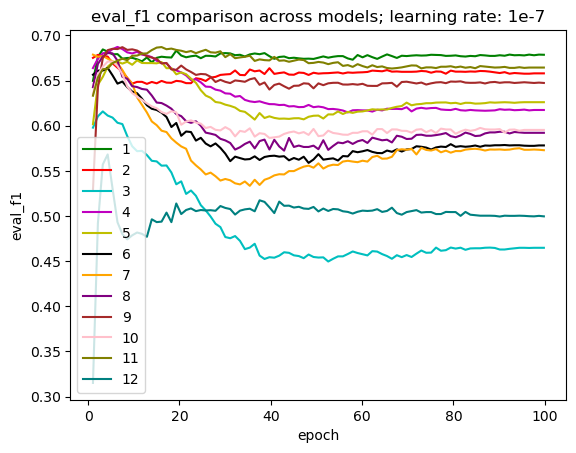

In [33]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'olive', 'teal']

plt.plot(epoch, data_v0, label='0', color=colors[0])
plt.plot(epoch, data_v1, label='1', color=colors[1])
plt.plot(epoch, data_v2, label='2', color=colors[2])
plt.plot(epoch, data_v3, label='3', color=colors[3])
plt.plot(epoch, data_v4, label='4', color=colors[4])
plt.plot(epoch, data_v5, label='5', color=colors[5])
plt.plot(epoch, data_v6, label='6', color=colors[6])
plt.plot(epoch, data_v7, label='7', color=colors[7])
plt.plot(epoch, data_v8, label='8', color=colors[8])
plt.plot(epoch, data_v9, label='9', color=colors[9])
plt.plot(epoch, data_v10, label='10', color=colors[10])
plt.plot(epoch, data_v11, label='11', color=colors[11])
plt.plot(epoch, data_v12, label='12', color=colors[12])

plt.xlabel('epoch')
plt.ylabel(f'{data_type}')
plt.title(f'{data_type} comparison across models; learning rate: {lr}')
plt.legend(title='num of unfrozen pretrained layers')
plt.legend()
plt.show()

### Layer freezing experiment plots for testing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
layers = range(0, 13)

all_test_data = {}

In [ ]:
for layer in layers:
    model_name = f'fine_tune_parallel_v{layer}'
    results = pd.read_csv(f'/scratch/gpfs/aa8417/QCB557_project/model_output/parallel_{lr}_041624/results_{model_name}.csv')
    
    true_labels = results['true_labels']
    predicted_labels = results['predicted_labels']
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    
    all_test_data[model_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                  'f1': f1}

In [ ]:
# accuracy, precision, recall, f1
data_type = 'f1'

model_name_0 = f'fine_tune_parallel_v0'
model_name_1 = f'fine_tune_parallel_v1'
model_name_2 = f'fine_tune_parallel_v2'
model_name_3 = f'fine_tune_parallel_v3'
model_name_4 = f'fine_tune_parallel_v4'
model_name_5 = f'fine_tune_parallel_v5'
model_name_6 = f'fine_tune_parallel_v6'
model_name_7 = f'fine_tune_parallel_v7'
model_name_8 = f'fine_tune_parallel_v8'
model_name_9 = f'fine_tune_parallel_v9'
model_name_10 = f'fine_tune_parallel_v10'
model_name_11 = f'fine_tune_parallel_v11'
model_name_12 = f'fine_tune_parallel_v12'

data = [
    all_test_data[model_name_0][data_type],
    all_test_data[model_name_1][data_type],
    all_test_data[model_name_2][data_type],
    all_test_data[model_name_3][data_type],
    all_test_data[model_name_4][data_type],
    all_test_data[model_name_5][data_type],
    all_test_data[model_name_6][data_type],
    all_test_data[model_name_7][data_type],
    all_test_data[model_name_8][data_type],
    all_test_data[model_name_9][data_type],
    all_test_data[model_name_10][data_type],
    all_test_data[model_name_11][data_type],
    all_test_data[model_name_12][data_type]
]

In [ ]:
plt.plot(layers, data)

plt.xticks(layers)

plt.xlabel('num. of unfrozen layers')
plt.title(f'{data_type} comparison across models; learning rate: {lr}')
plt.ylabel(f'{data_type}')
plt.show()

### stochasticity plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
princeton_id = 'ns5404'
replicate_results_dir = f'/scratch/gpfs/{princeton_id}/QCB557_project/model_output/replicate_042524'
replicates = range(0,30)
layers = range(0, 13)
lr = '1e-7'

In [3]:
all_train_data = {}
for rep in replicates:
    for layer in layers:
        model_name = f'fine_tune_parallel_v{layer}'
        log = pd.read_csv(f'{replicate_results_dir}/rep{rep}/log_{model_name}.csv')
    
        epoch = log['epoch'].unique()[:-1]
        train_loss = np.array(log['loss'].dropna())
        valid_loss = np.array(log['eval_loss'].dropna())
        eval_accuracy = np.array(log['eval_accuracy'].dropna())
        eval_precision = np.array(log['eval_precision'].dropna())
        eval_recall = np.array(log['eval_recall'].dropna())
        eval_f1 = np.array(log['eval_f1'].dropna())
        
        all_train_data[f'rep{rep}_{model_name}'] = {'epoch': epoch[-1], 'train_loss': train_loss[-1], 'valid_loss': valid_loss[-1], 
                                      'eval_accuracy': eval_accuracy[-1], 'eval_precision': eval_precision[-1], 'eval_recall': eval_recall[-1],
                                      'eval_f1': eval_f1[-1]}


In [4]:
layer_train_data = {}
for layer in layers:
    layer_train_data[f'fine_tune_parallel_v{layer}'] = {}
    train_loss = []
    valid_loss = []
    eval_accuracy = []
    eval_precision = []
    eval_recall = []
    eval_f1 = []

    layer_data = {key: value for key, value in all_train_data.items() if re.search(f'.*_fine_tune_parallel_v{layer}$', key)}


    #print(len(layer_data))
    for k,v in layer_data.items():
        
        train_loss.append(v['train_loss'])
        #print(v)
        valid_loss.append(v['valid_loss'])
        eval_accuracy.append(v['eval_accuracy'])
        eval_precision.append(v['eval_precision'])
        eval_recall.append(v['eval_recall'])
        eval_f1.append(v['eval_f1'])

    #print(layer)
    #print(len(this_train_loss))
    layer_train_data[f'fine_tune_parallel_v{layer}'] = {
        'train_loss': train_loss,
        'valid_loss': valid_loss,
        'eval_accuracy': eval_accuracy,
        'eval_precision': eval_precision,
        'eval_recall': eval_recall,
        'eval_f1': eval_f1
    }


In [5]:
all_test_data = {}
for rep in replicates:
    for layer in layers:
        model_name = f'fine_tune_parallel_v{layer}'
        results = pd.read_csv(f'{replicate_results_dir}/rep{rep}/results_{model_name}.csv')
    
        true_labels = results['true_labels']
        predicted_labels = results['predicted_labels']
        
        accuracy = accuracy_score(true_labels, predicted_labels)
        precision = precision_score(true_labels, predicted_labels)
        recall = recall_score(true_labels, predicted_labels)
        f1 = f1_score(true_labels, predicted_labels)
        
        all_test_data[f'rep{rep}_{model_name}'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                      'f1': f1}


In [6]:
layer_test_data = {}
for layer in layers:
    layer_test_data[f'fine_tune_parallel_v{layer}'] = {}
    test_accuracy = []
    test_precision = []
    test_recall = []
    test_f1 = []

    layer_data = {key: value for key, value in all_test_data.items() if re.search(f'.*_fine_tune_parallel_v{layer}$', key)}


    #print(len(layer_data))
    for k,v in layer_data.items():
        
        test_accuracy.append(v['accuracy'])
        #print(v)
        test_precision.append(v['precision'])
        test_recall.append(v['recall'])
        test_f1.append(v['f1'])

    layer_test_data[f'fine_tune_parallel_v{layer}'] = {
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
    }

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


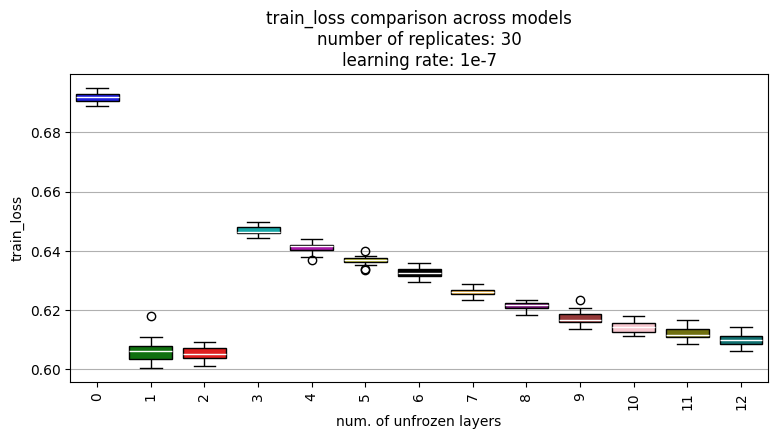

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


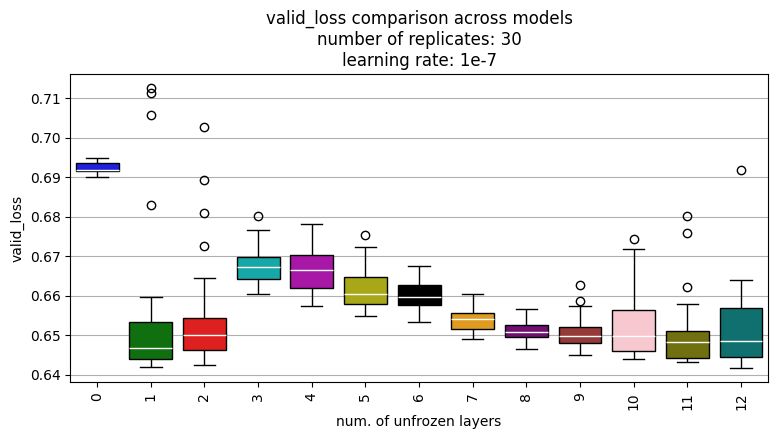

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


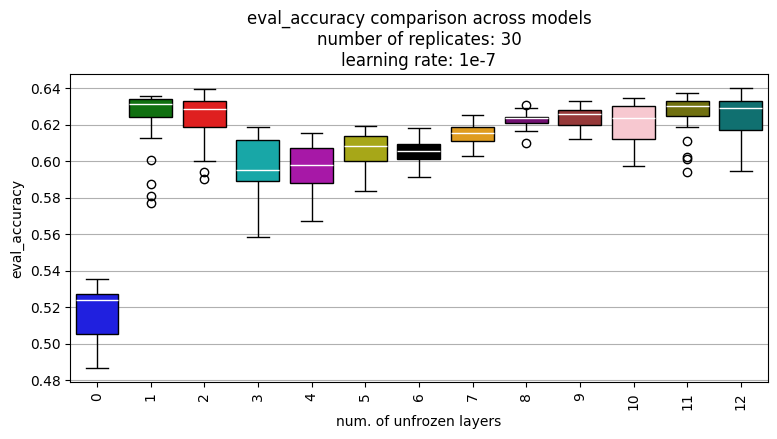

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


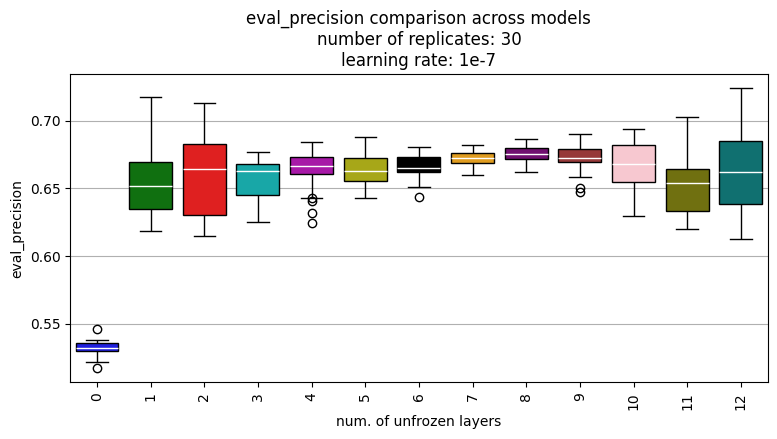

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


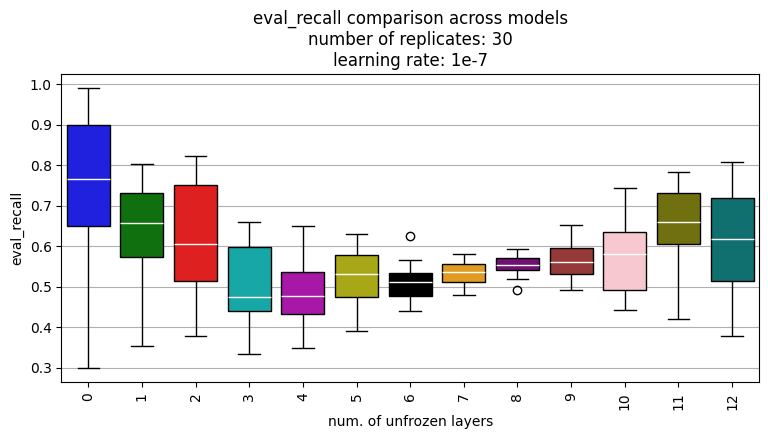

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


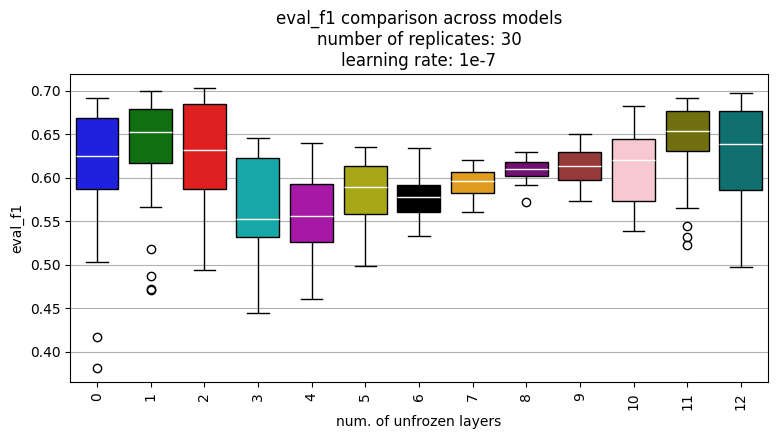

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


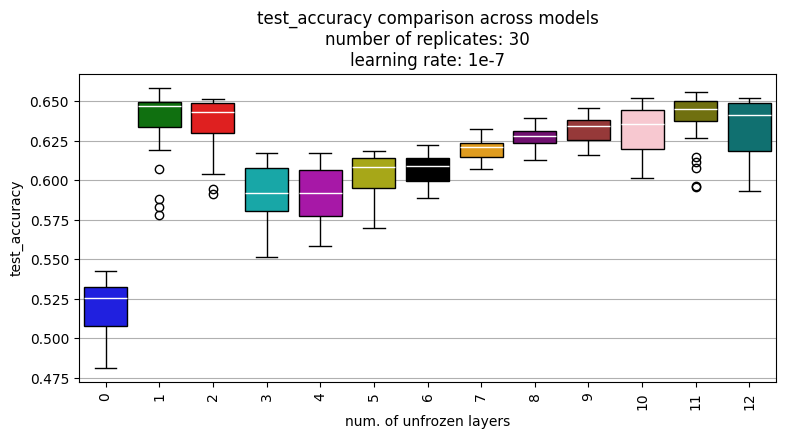

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


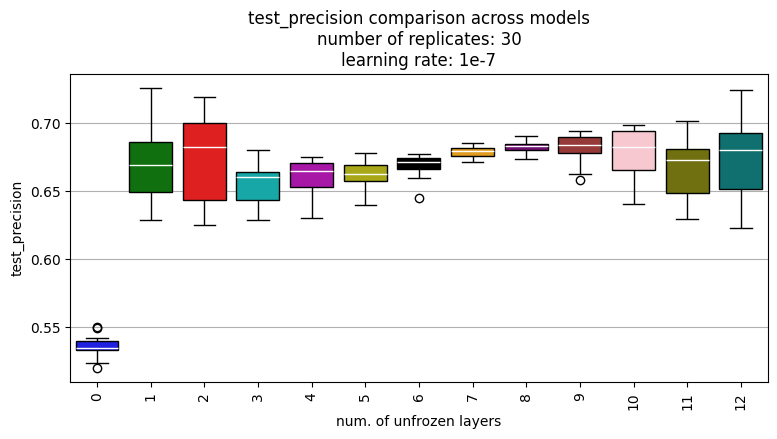

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


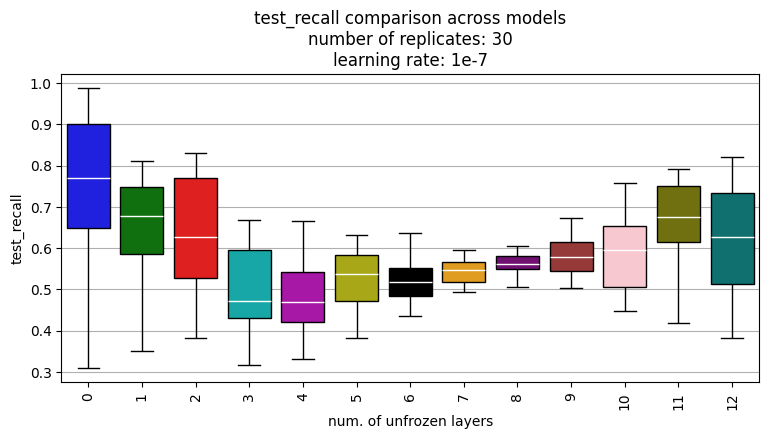

/tmp/ipykernel_538179/1989161734.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(layers));


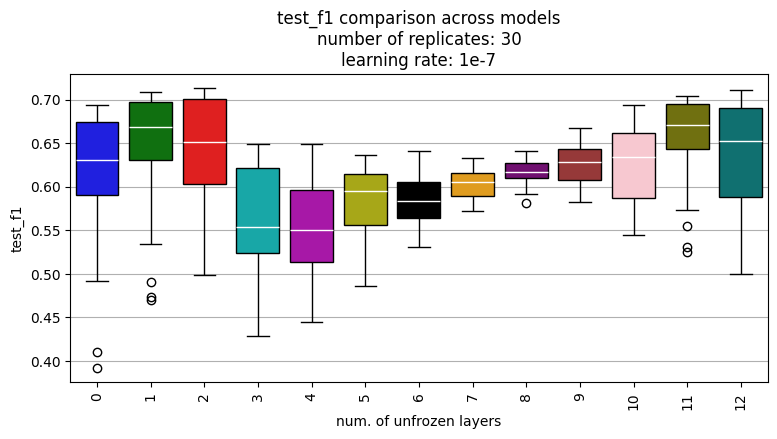

In [7]:
for data_type in ['train_loss', 'valid_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1',
                 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']:

    boxplot_df = pd.DataFrame()
    for layer in layers:
        if 'test' in data_type:
            boxplot_df[f'fine_tune_parallel_v{layer}'] = layer_test_data[f'fine_tune_parallel_v{layer}'][data_type]
        else:
            boxplot_df[f'fine_tune_parallel_v{layer}'] = layer_train_data[f'fine_tune_parallel_v{layer}'][data_type]


    #boxplot of replicate performance metrics
    #x-axis: number of layers unfrozen
    #y-axis: score
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'olive', 'teal']
    
    fig, ax = plt.subplots(nrows=1,figsize=(9, 4));
    
    sns.boxplot(boxplot_df, palette = colors, medianprops=dict(color="white"));
    ax.tick_params(axis='x', rotation=90);
    ax.set_xticklabels(list(layers));
    
    ax.yaxis.grid(True);
    ax.set_xlabel('num. of unfrozen layers');
    plt.title(f'{data_type} comparison across models\nnumber of replicates: {len(replicates)}\nlearning rate: {lr}');
    plt.ylabel(f'{data_type}');
    plt.show()


In [8]:
layer_train_data['fine_tune_parallel_v1']

{'train_loss': [0.6103,
  0.6023,
  0.6071,
  0.6067,
  0.6034,
  0.6059,
  0.6071,
  0.6074,
  0.6085,
  0.6086,
  0.6033,
  0.6059,
  0.609,
  0.6067,
  0.6048,
  0.6069,
  0.6082,
  0.6058,
  0.6041,
  0.6005,
  0.6026,
  0.6109,
  0.6023,
  0.6037,
  0.61,
  0.6023,
  0.6067,
  0.6035,
  0.6059,
  0.6182],
 'valid_loss': [0.6465205550193787,
  0.6439228653907776,
  0.6524841785430908,
  0.6438963413238525,
  0.6535847783088684,
  0.6569033861160278,
  0.6468015909194946,
  0.6420091986656189,
  0.6424012184143066,
  0.649764358997345,
  0.6421617269515991,
  0.6442189812660217,
  0.6433278918266296,
  0.6576834321022034,
  0.6595678925514221,
  0.6517367362976074,
  0.6471245884895325,
  0.6528434753417969,
  0.6456881761550903,
  0.644679844379425,
  0.6429204344749451,
  0.7111837267875671,
  0.683010458946228,
  0.642831563949585,
  0.7056740522384644,
  0.6461474895477295,
  0.6440723538398743,
  0.6508187651634216,
  0.6448601484298706,
  0.7125362753868103],
 'eval_accuracy':

In [9]:
layer_test_data['fine_tune_parallel_v1']

{'test_accuracy': [0.6415760869565217,
  0.6584239130434782,
  0.6467391304347826,
  0.6497282608695653,
  0.626358695652174,
  0.6453804347826086,
  0.6497282608695653,
  0.6451086956521739,
  0.6497282608695653,
  0.6331521739130435,
  0.6554347826086957,
  0.6489130434782608,
  0.6494565217391305,
  0.6440217391304348,
  0.6190217391304348,
  0.6364130434782609,
  0.6497282608695653,
  0.6502717391304348,
  0.6551630434782608,
  0.6326086956521739,
  0.6470108695652174,
  0.5880434782608696,
  0.6073369565217391,
  0.65,
  0.5828804347826086,
  0.6423913043478261,
  0.6508152173913043,
  0.6467391304347826,
  0.6494565217391305,
  0.5782608695652174],
 'test_precision': [0.6771697070204533,
  0.6632605666511844,
  0.6338199513381995,
  0.6737441740031072,
  0.7027027027027027,
  0.6308429884139033,
  0.6445497630331753,
  0.670490093847758,
  0.6607570675610924,
  0.7017195767195767,
  0.6674733785091965,
  0.6515426497277677,
  0.6496872207327972,
  0.6283570300157978,
  0.70914542